# Arbol de Regresion

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv('../python-ml-course/datasets/boston/Boston.csv')
dataset.head()
#https://www.kaggle.com/c/boston-housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
dataset.shape

(506, 14)

### Procesamiento de Datos

In [4]:
predictors=dataset.columns.values.tolist()[:13]
target=dataset.columns.values.tolist()[13]
X=dataset[predictors]
Y=dataset[target]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train,y_test=train_test_split(X,Y,test_size=.3,random_state=0)

### Creacion del modelo

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
regtree=DecisionTreeRegressor(min_samples_split=30,min_samples_leaf=10,random_state=0)
regtree.fit(x_train,y_train)
predictions=regtree.predict(x_test)

list(zip(predictions,y_test))[:11]


[(23.659259259259258, 22.6),
 (26.742105263157896, 50.0),
 (23.05454545454546, 23.0),
 (13.891304347826088, 8.3),
 (19.487999999999996, 21.2),
 (21.518181818181816, 19.9),
 (21.4047619047619, 20.6),
 (21.518181818181816, 18.7),
 (21.4047619047619, 16.1),
 (19.757894736842108, 18.6),
 (10.466666666666667, 8.8)]

### Visualizacion de Arbol

In [38]:
from sklearn.tree import export_graphviz

In [41]:
with open('boston-rtree.dot','w') as dotfile: #creamos un archivo llamado iris-dtree.dot
    export_graphviz(regtree,out_file=dotfile,feature_names=predictors) #seteamos los parametros(modelo,archivo,predictores)
    dotfile.close()

In [39]:
import os
from graphviz import Source #(conda install python-graphviz)

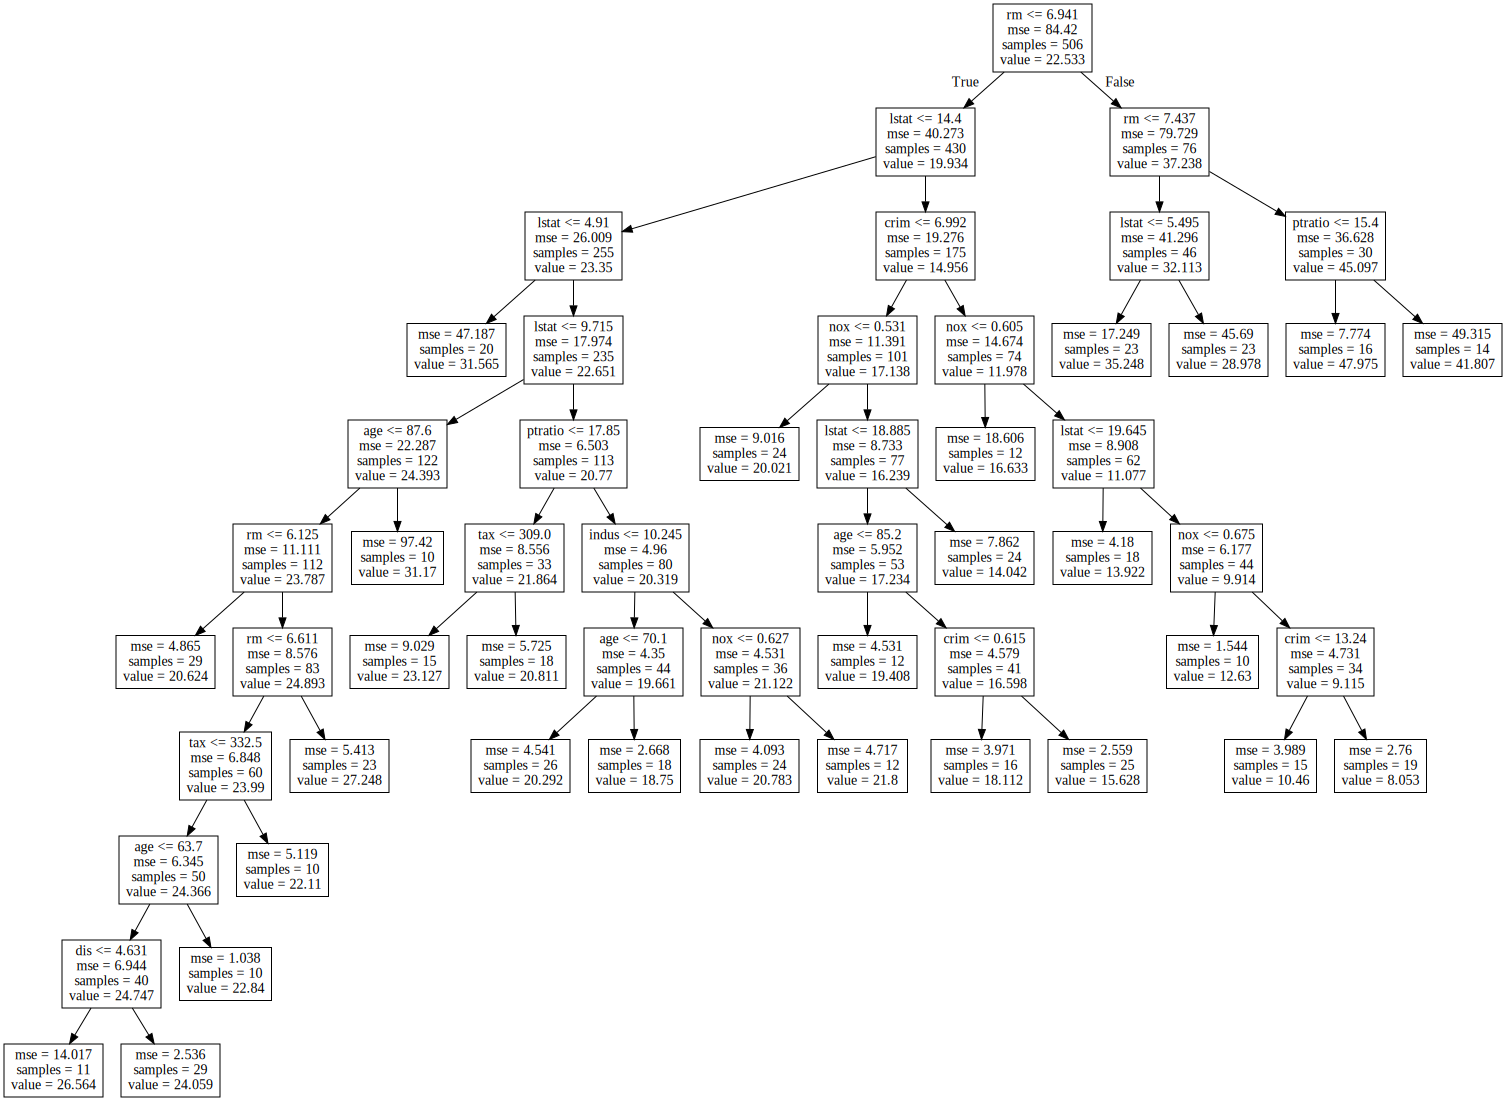

In [43]:
file=open('boston-rtree.dot','r')
text=file.read()
Source(text)

### Validacion del Modelo

In [91]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [96]:
cross_validation=KFold(n_splits=10,shuffle=True,random_state=1)
scores=cross_val_score(regtree,X,Y,scoring='mean_squared_error',cv=cross_validation,)
scores.mean()#score basado en el error cuadrado (mas cercano a cero es mejor)

-20.107307036443846

In [97]:
list(zip(predictors,regtree.feature_importances_)) #importancia de las variables

[('crim', 0.027408822548249674),
 ('zn', 0.0),
 ('indus', 0.0),
 ('chas', 0.0),
 ('nox', 0.0),
 ('rm', 0.6798194971320766),
 ('age', 0.005383674422757539),
 ('dis', 0.005208671542042429),
 ('rad', 0.0),
 ('tax', 0.0020127138087849723),
 ('ptratio', 0.0),
 ('black', 0.006193859266693023),
 ('lstat', 0.27397276127939585)]